In [1]:
!pip install pystan
!pip install fbprophet

In [2]:
import pandas as pd
# read data from NY times
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [3]:
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [4]:
# engineer new cases
df['new_cases'] = df.cases - df.cases.shift().fillna(0)
df.head()

,date,cases,deaths,new_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0


In [5]:
# create pandas time series
df.date = pd.to_datetime(df.date)
df.set_index('date',inplace=True)
df['rolling_weekly_avg'] = df.new_cases.rolling(window=7).mean().fillna(0)

In [6]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':df.index,'y':df.new_cases})
ts.head()

,ds,y
date,,
2020-01-21,2020-01-21,1.0
2020-01-22,2020-01-22,0.0
2020-01-23,2020-01-23,0.0
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,1.0


In [18]:
ts.tail()

,ds,y
date,,
2022-01-17,2022-01-17,712051.0
2022-01-18,2022-01-18,1178403.0
2022-01-19,2022-01-19,851784.0
2022-01-20,2022-01-20,748484.0
2022-01-21,2022-01-21,825052.0


In [14]:
from fbprophet import Prophet
# instantiate the model and fit the timeseries
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)
prophet.fit(ts)

In [19]:
# create a future data frame 
future = prophet.make_future_dataframe(periods=100) ## day base
future

,ds
0,2020-01-21
1,2020-01-22
2,2020-01-23
3,2020-01-24
4,2020-01-25
...,...
827,2022-04-27
828,2022-04-28
829,2022-04-29
830,2022-04-30


In [20]:
forecast = prophet.predict(future)
# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-21,-1144.690752,-64671.857960,60620.994235
1,2020-01-22,-1045.391075,-64340.831015,60769.000828
2,2020-01-23,-941.034387,-62404.527908,62452.710321
3,2020-01-24,-883.737043,-67344.121701,58395.915753
4,2020-01-25,-599.670220,-61967.519153,64870.950141


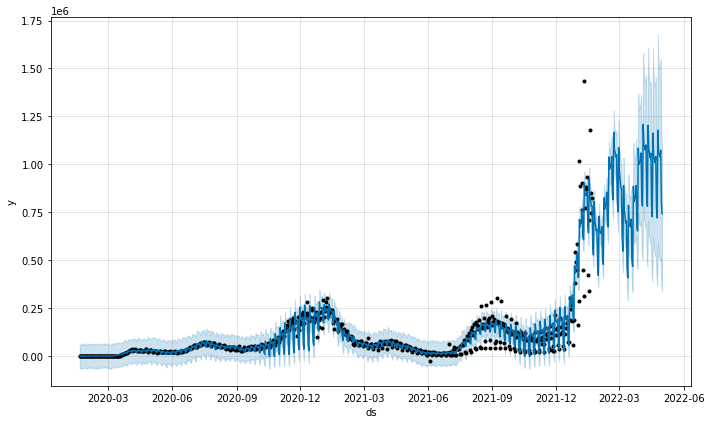

In [21]:
# plot
fig = prophet.plot(forecast)

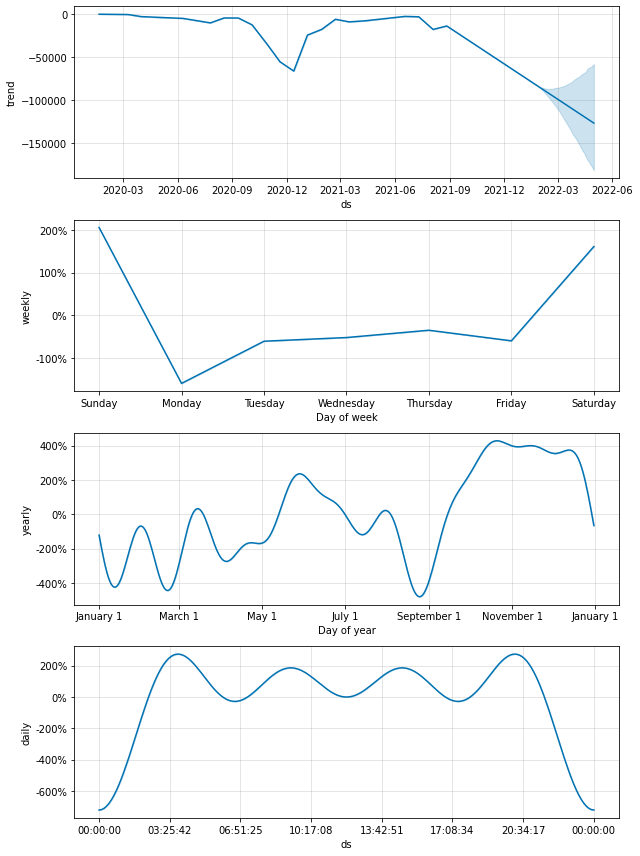

In [22]:
## forecast components: 
## trend, yearly seasonality, and weekly seasonality of the time series. 
fig2  = prophet.plot_components(forecast)